In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


# График сравнения теории и намикса: электростатический потенциал и профиль плотности полимера

Параметры

In [9]:
N = 100
S = 50
D = 75
valence = -0.5

# Для 2D
L_pore = 120
space = 15
L_wall = 30

Cs = 0.001
chi_solv = 0.5
chi_surf = 0

# Теория

In [10]:
N, n, theta, H, r_in_dendrons, r_out_dendrons, psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, _ = dendrons_pore(
    Cs = Cs,
    
    #параметры щетки
    alpha = abs(valence),
    S = S,
    
    #параметры поры
    D = D,
    N_opt = N,
    
)

print(N, theta, H)

100 942.4777960769379 [62.63291954]


# Namics 2D

In [11]:

# Загрузить конфигурацию
config = config_loader.load_config()

# Обновить параметры
params_to_update = {
    "Cs": Cs,
    "D": D,
    "L_pore": L_pore,
    "L_wall": L_wall,
    "N": N,
    "S": S,
    "chi_solv": chi_solv,
    "chi_surf": chi_surf,
    "max_val": 0.1,
    "min_val": 0.1,
    "output_dir": "2D_pore_in_files_fig2",
    "range_param": 'Cs',
    "space": space,
    "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
    "valence": valence,
}

for param, value in params_to_update.items():
    config = config_loader.update_config_param(config, param, value)

# Сохранить обновлённую конфигурацию
config_loader.save_config(config)


INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 75
INFO:root:Обновление параметра L_pore на 150
INFO:root:Обновление параметра L_wall на 30
INFO:root:Обновление параметра N на 100
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig2
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 30
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


# Расчет

In [12]:
df, x, y, psi, phi_brush, phi_end_brush = out_reader()

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Файл 2D_eps_80_Cs_0_0010_L150_0_L_wall_30_0_space_30_0_v_-0_50_D_75_N_100_theta_942_48.in успешно создан в 2D_pore_in_files_fig2


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 1.209891e+01 
iterations = 1 g = 1.074973e+01 
iterations = 2 g = 9.635942e+00 
iterations = 3 g = 7.094195e+00 
iterations = 4 g = 6.680307e+00 
iterations = 5 g = 5.753046e+00 
iterations = 6 g = 5.590239e+00 
iterations = 7 g = 6.305601e+00 
iterations = 8 g = 5.247349e+00 
iterations = 9 g = 5.441974e+00 
iterations = 10 g = 5.941614e+00 
iterations = 11 g = 6.174809e+00 
iterations = 12 g = 5.216531e+00 
iterations = 13 g = 5.935741e+00 
iterations = 14 g = 5.343562e+00 
iterations = 15 g = 5.094794e+00 
iterations = 16 g = 4.724249e+00 
iterations = 17 g = 4.648646e+00 
iterations = 18 g = 5.062287e+00 
iterations = 19 g = 5.149659e+00 
iterations = 20 g = 5.864719e+00 
iterations = 21 g = 5.439550e+00 
iterations = 22 g = 5.

ERROR:root:Ошибка при выполнении NAMICS: Command '['namics', '/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates/2D_pore_in_files_fig2/2D_eps_80_Cs_0_0010_L150_0_L_wall_30_0_space_30_0_v_-0_50_D_75_N_100_theta_942_48.in']' died with <Signals.SIGKILL: 9>.


CalledProcessError: Command '['namics', '/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates/2D_pore_in_files_fig2/2D_eps_80_Cs_0_0010_L150_0_L_wall_30_0_space_30_0_v_-0_50_D_75_N_100_theta_942_48.in']' died with <Signals.SIGKILL: 9>.

# Построение графика

In [6]:
# Доли от центра для y
y_fraction = [0]

# Используем функцию для получения значений по доле
psi_nam = get_profiles_by_y_or_x(df, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True)
phi_nam = get_profiles_by_y_or_x(df, y_fraction, profiles_name='combined_phi', groupby='y', coord='x', use_fraction=True)

<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2908329/3954090205.py:9: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")


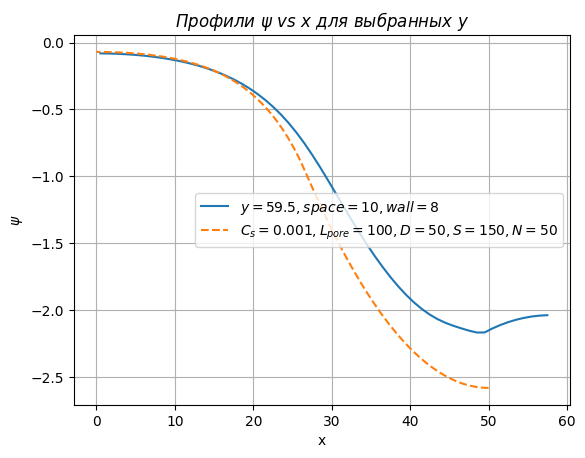

In [7]:
# Построение графиков
for y_val, data in psi_nam.items():
    plt.plot(data['x'], data['sys_noname_psi'], label=f"$y = {y_val}, space = {space}, wall = {L_wall}$")
    
plt.plot(np.hstack((r_in_dendrons, r_out_dendrons)), np.hstack((psi_in_dendrons, psi_out_dendrons)), linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')

plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")
plt.legend()
plt.grid()
plt.show()

# Электростатический потенциал

In [ ]:
# Построение графиков
for y_val, data in phi_nam.items():
    plt.plot(data['x'], data['combined_phi'], label=f"$y = {y_val}, space = {space}, wall = {L_wall}$")
    
plt.plot(r_in_dendrons, c_pol_dendrons, linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')

plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")
plt.legend()
plt.grid()
plt.show()